## Task: Classify ImageNet dataset 

###### Steps:
1. Download the images and split the data into train and validation
2. Normalize the dataset
3. Augment the dataset: random crop, random zoom, random brighness
4. Create a generator on top of the Dataset and do: Shuffle and Cache (& repeat Forever)
5. Display of the augmented image (to check that it works)
6. Create the model. Compile it and train it
7. Display the validation images, their predicted labels, and the true labels.

### OLD:
###### Learnings:
1. Check the weights initialization: that the output of layers is between (-1,1) 
2. Check the images input is between (-0.5, 0.5)
3. Momentum can cause non-monotonic gradient descent, but it also helps for faster convergence

4. Assumption: When val_loss is much smaller than the loss, it means that the training images are harder to classify than the test images, and this forces the network to learn more generic properties (generalizes better). But on the other hand, if these properties are never found in real-life (validation-set), the network shouldn't need to learn them.

###### Debugging:
1. If the network doesn't train, simplify it by removing layers. That helps finding which layer is bad.

###### TODO
1. Check that the weights range is correct everywhere
2. Augment with rotation.

3. Right now the best score is:
######  Epoch 60/60 - 46s - loss: 1.4908 - acc: 0.4645 - val_loss: 1.6860 - val_acc: 0.4455 
One of my assumtions is that I could get a higher score if I would have more images, or more classes. In Alexnet paper the acc is ~63%. In another notebook (same folder here on github), I'm testing the same AlexNet model on cifar10 and I noted how increasing the dataset size increases the score as well (I got 65% there and the training wasn't even finished).

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties
import IPython.display as display
#from PIL import Image

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import tensorflow as tf
from tensorflow import keras


In [2]:
# from https://www.tensorflow.org/guide/gpu#limiting_gpu_memory_growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


### Procesing the images

In [4]:
# Trash code
# convert the compressed string to a 3D uint8 tensor
#img = tf.image.decode_jpeg(img, channels=3)
# Use `convert_image_dtype` to convert to floats in the [0,1] range.
#return tf.image.convert_image_dtype(img, tf.float32)

In [ ]:
# Finally we apply normalisation and augmentation on all of the data
augmented_train_ds = prepare(train_ds, is_train=True)
normalized_validation_ds = prepare(validation_ds, is_train=False)

### Preprocessing the images

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 256)       614656    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 384)         885120    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 6, 6, 384)         1327488   
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 256)        

In [27]:
history = model.fit_generator(generator=train_ds,
                    steps_per_epoch = STEPS_PER_EPOCH,                    
                    validation_data = test_ds, 
                    epochs=60)

Epoch 1/60
19/19 [==============================] - 78s 4s/step - loss: 6.6497 - acc: 0.0592 - top_k_categorical_accuracy: 0.1702 - val_loss: 2.8396 - val_acc: 0.0765 - val_top_k_categorical_accuracy: 0.1965
Epoch 2/60
19/19 [==============================] - 70s 4s/step - loss: 2.8476 - acc: 0.0728 - top_k_categorical_accuracy: 0.1933 - val_loss: 2.8248 - val_acc: 0.0835 - val_top_k_categorical_accuracy: 0.2452
Epoch 3/60
19/19 [==============================] - 70s 4s/step - loss: 2.8126 - acc: 0.0806 - top_k_categorical_accuracy: 0.2220 - val_loss: 2.7967 - val_acc: 0.0870 - val_top_k_categorical_accuracy: 0.2470
Epoch 4/60
19/19 [==============================] - 70s 4s/step - loss: 2.7877 - acc: 0.0839 - top_k_categorical_accuracy: 0.2257 - val_loss: 2.7772 - val_acc: 0.0852 - val_top_k_categorical_accuracy: 0.2591
Epoch 5/60
19/19 [==============================] - 70s 4s/step - loss: 2.7720 - acc: 0.0843 - top_k_categorical_accuracy: 0.2303 - val_loss: 2.7335 - val_acc: 0.1061 -

KeyboardInterrupt: 

In [104]:
image_batch, label_batch = next(iter(test_ds))
predictions = model.predict(image_batch)

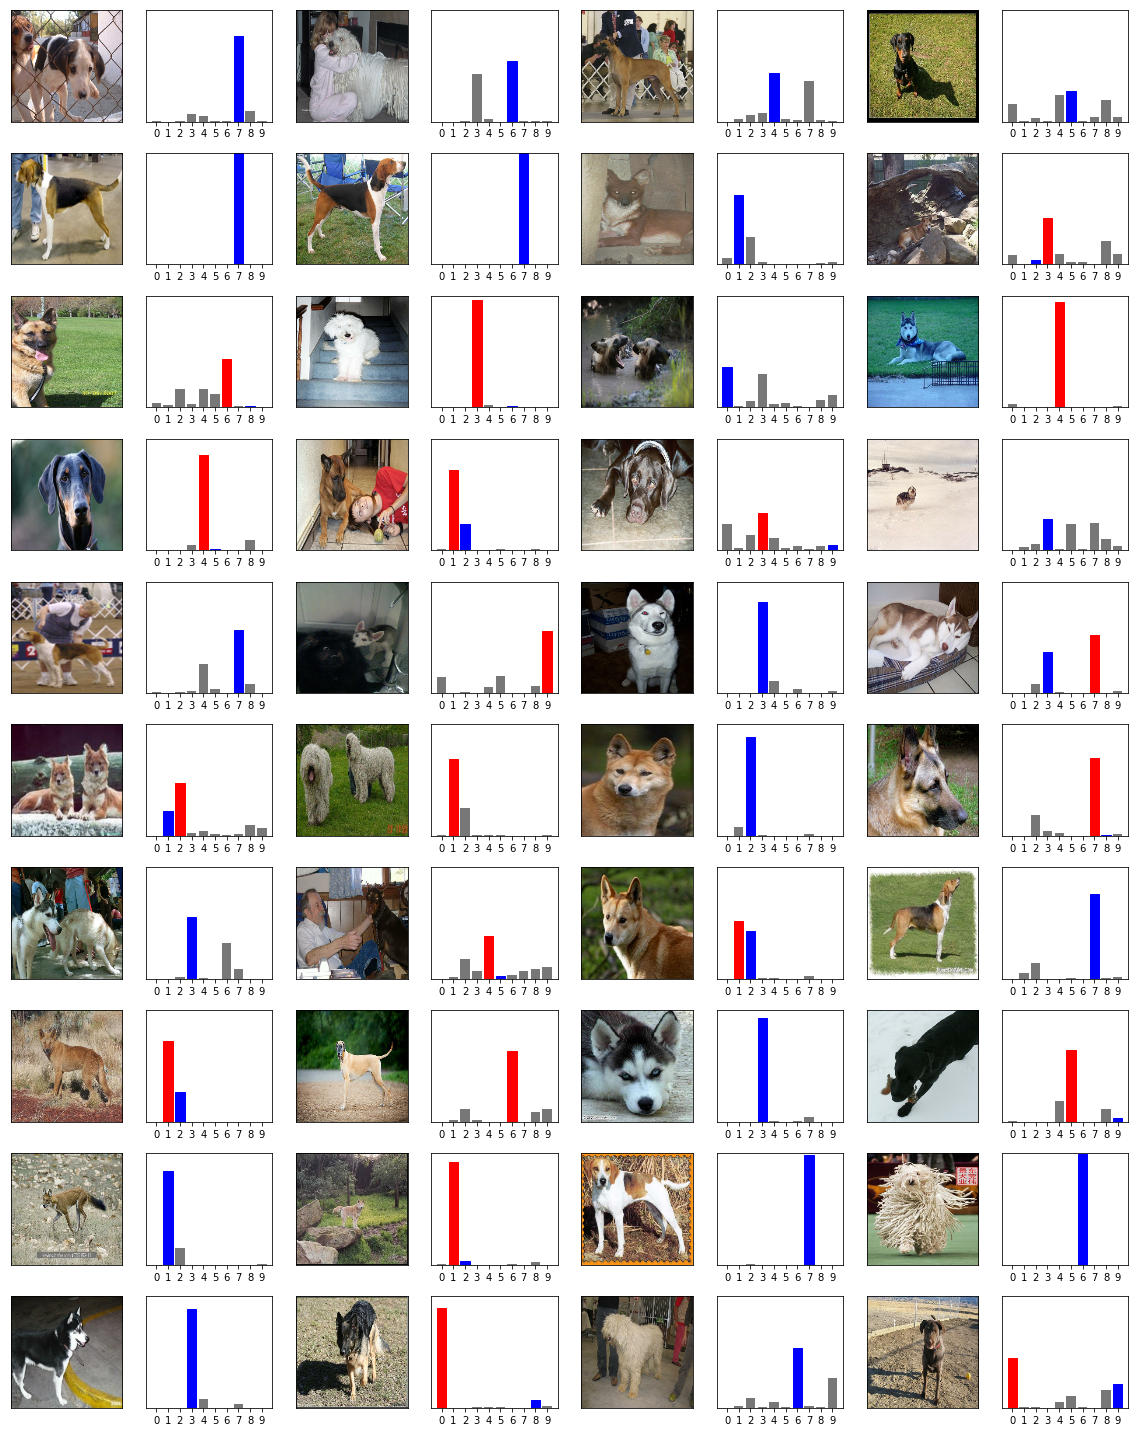